<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2020)</h2>
<h2 align="center">Lab 10: SVM </h2>
<h3 align="center">Eng. Ahmed Wael</h3>

## Import the needed libraries

In [ ]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC


# Outline:

*   SVM Intuition


*   Hard vs Soft Margins


*   C hyper-parameter


*   Kernel Trick


*   Kernel Types


*   SVM with Linear Dataset


*   SVM with Non-linear Dataset


*   Hyper-parameter Tuning & Cross Validation


*   Multi-class SVM


*   SVM with Regression


*   Tasks



# SVM Intuition:

## What is the best hyper-plane?

### Case 1: Correct Classification

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_21.png>

**The best hyper-plane is the one that separates the two classes better**

**Therefore, B is best one in this case**

### Case 2: Maximizing the Margin

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_3.png>

**The three hyper-planes separate the two classes, but which of them is the best one?**

**We care about maximizing the distances between the nearest data point (either class) and hyper-plane**

**We call this distance The Margin**

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_4.png>

**Thus, C is the best hyper-plane.**

### Case 3: Correct Classification vs Maximizing the Margin

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_5.png>

**By default, SVM gives more weight to correct classification than margin maximization.**

**Thus, A is the best classifier in this case**

### Case 4: Outliers

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_71.png>

**SVM gives more weight to correct classification than margin maximization, right?**


**However, this also means that margin maximization is important!**

**Thus, SVM can detect outliers and ignore them**

### Case 5: Non-linear hyper-plane:

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_8.png>

**SVM solves this by introducing a new feature which is**

$$z = x^2 + y^2$$

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_9.png>

**This feature is NOT added manually**

**It is done using the KERNEL!**

## What is the SVM Kernel?

- It takes low dimensional input space and transforms it to a higher dimensional space


- Converts not separable problem to separable problem.


- Mostly useful in non-linear separation problem.

## Why Maximize Margin?

<img src=https://i.ibb.co/Qf5bzR2/1.jpg>

**This line not only separates
the two classes but also
stays as far away from the
closest training instances
as possible**

**Robust even with high margin of noise**

# Hard vs Soft Margins

## Margin Equation:

<img src=https://i.ibb.co/d7wXYw0/2.jpg>

**if we want to Maximize M**

$$M = \frac{2}{|w|}$$

**This means we want to minimize:**

$$ \frac{1}{2}w^Tw$$

**So, we have an optimization problem as follows:**

Find w and b such that:


- $$\phi(w) = \frac{1}{2}w^Tw$$ is minimized


- For all $${(x_i ,y_i)}: y_i (w^Tx_i + b) ≥ 1$$


- Need to optimize a quadratic function subject to linear constraints.


- Quadratic optimization problems are a well-known class of mathematical programming problems.


- The solution involves constructing a dual problem where a Lagrange multiplieris associated with every constraint in the primary problem.

**This is out of the scope for the course, but will find in the resources at the end of the notebook how all is this is done mathemtically**

<img src=https://miro.medium.com/max/1172/1*PiGj6vEyBhxbXfK4bzwwTg.png>

**Hard Margin Requires ALL data points to be classified correctly**

**What if the training set is noisy?**


**The kernel will be very complex in order to fit all the data correctly**

**Thus, will result in OVERFITTING**

<img src=https://i.ibb.co/C6YcH9j/3.jpg>

**Slack variables ε can be added to allow misclassification of difficult or noisy examples.**

<img src=https://i.ibb.co/Qbb8D7g/4.jpg>

**Now, we want to minimze:**

$$ \frac{1}{2}w^Tw + C \sum{\varepsilon_k}$$

**So, the new formulation for the optimization problem:**

Find w and b such that:


- $$\phi(w) = \frac{1}{2}w^Tw + C \sum{\varepsilon_k}$$ is minimized


- For all $${(x_i ,y_i)}: y_i (w^Tx_i + b) ≥ 1 - \varepsilon_i$$ 

$$ \varepsilon_i ≥ 0 $$

# C Hyperparameter

- **Parameter C can be viewed as a way to control overfitting**

- **C bounds the sum of the εi ’s, and so it determines the number and severity of the violations to the margin (and to the hyperplane) that we will tolerate.**


- **Increasing C, increases bias, reduces the variance (we become more tolerant of violations to the margin, margin will widen)**


- **Decreasing C, reduces bias, increases variance (we become less tolerant of violations to the margin, margin narrows)**


- **C is generally chosen via cross-validation.**

# Kernel Trick

**After Solving the lagrange optimization problem, we will have**
$$min_\alpha = -\sum{\alpha_i} + \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}{y^i y^j \alpha^i \alpha^j <X^i, X^j> } $$

Where $$ <X^i, X^j > $$ is the dot product between two examples, subject to $$ \alpha_i > 0$$ $$\sum{\alpha_i y^i} = 0$$
and 
$$ \alpha$$
is the a slack variable introduced in the lagrangian, which we are solving for

<img src = https://i.ibb.co/rZMd7mS/6.jpg>

**Now, the kernel Trick**

Imagine a function φ that maps the data into another space


<img src= https://i.ibb.co/7QvhKPR/7.jpg pos=10>



The function we want to optimize is the **dot product** of the two feature vectors.

If we now transform to φ, instead of computing this dot product (xi•xj) we will have to compute (φ (xi)• φ (xj)).

But how can we do this? This is **expensive** and **time consuming**

(suppose φ is a quartic polynomial … or worse, we don’t know the
function explicitly.

If there is a **"kernel function"** K such that $$K(x_i,x_j) = φ (x_i)• φ (x_j)$$ 

Then **we do not need to knowor compute φ at all!!**

That is, the kernel function defines **inner products** in the transformed space.

Or, it defines **similarity** in the transformed space.

Thus, we have now:
$$min_\alpha = -\sum{\alpha_i} + \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}{y^i y^j \alpha^i \alpha^j K(<X^i, X^j>) } $$

## Kernel Trick Example

$$K(x_i,x_j) = (<x_i,x_j> + 1)^p$$, where p is a tunable parameter


**Evaluating K only requires ONE ADDITION and ONE EXPONENTATION
more than the original dot product**

# Kernel Types:

## Polynomial Kernel:

Very cool visualization video!
https://www.youtube.com/watch?v=3liCbRZPrZA

$$K(x_i,x_j) = (<x_i,x_j> + b)^d$$
where *d* is the degree of the ploynomial and *b* is a free parameter trading off the influence of higher-order versus lower-order terms in the polynomial

What if 𝜑(x<sup>i</sup>) degree is really big?


For example, if you have 16*16 pixel image and you
apply polynomial with degree of 5. this will result in
10<sup>10</sup> features!!!

**Without the Kernel trick, this would have been impossible!**

## Gaussian Radial Basis Function Kernel:

Another technique to tackle nonlinear problems is to add features computed using a similarity function


Check this very cool video https://www.youtube.com/watch?v=Z2_yh2sice8

**Similarity function** measures how much each instance resembles a particular landmark.

$$𝜑(x_i , l )  = exp^{(γ|x^i - l|)}$$

Where 
$$ l$$ is the landmark


### Gamma Hyper-parameter

Gamma is a hyperparameter that controls the distance of influence of a single training point.

- Low values of gamma indicates a large similarity radius which results in more points being grouped together.

- For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). 

- Therefore, models with very large gamma values tend to overfit.

<img src = https://i.ibb.co/d0C8Dh4/8.jpg>

### Trade-off between Gamma and C

<img src=https://i.ibb.co/xHRWwBj/9.jpg>

- Smaller gamma value makes the bell shaped curve wider
- Instances have a larger range of influence
- The decision boundary ends up smoother.


- Bigger gamma makes the bell shaped curve narrower.
- Each instane's range of influence is smaller.
- The decision boundary ends up being more irregular, wiggling around individual instances.

## Sigmoid Kernel:

$$ 𝝋(x_i,x_j)= \tanh(ax_i^𝑇 x_𝑗+𝑐)$$

- Neural networks use sigmoid as activation function


- SVM with a sigmoid kernel is equivalent to 2 layer perceptron

##Cosine Similarity kernel
$$ 𝝋(𝑥_𝑖,𝑥_𝑗)= \frac{𝑥_𝑖^𝑇𝑥_𝑖}{||𝑥_𝑖|||𝑥_𝑗||}$$

- Popular choice of measuring similarity of text documents
- 𝐿2 norm project vectors onto the unit sphere, their dot product is the cosine of the
angle between the vectors.

## Other Kernel methods:

- Chi Square

- String 

- Tree

- Graph

- Wavelet

- and many many more...

# CODE: SVM with Linear Dataset

- We are going to work with Iris Dataset


## Loading the data


In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=42)

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]


## Training a classifier


In [ ]:
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=0.5, kernel='linear')

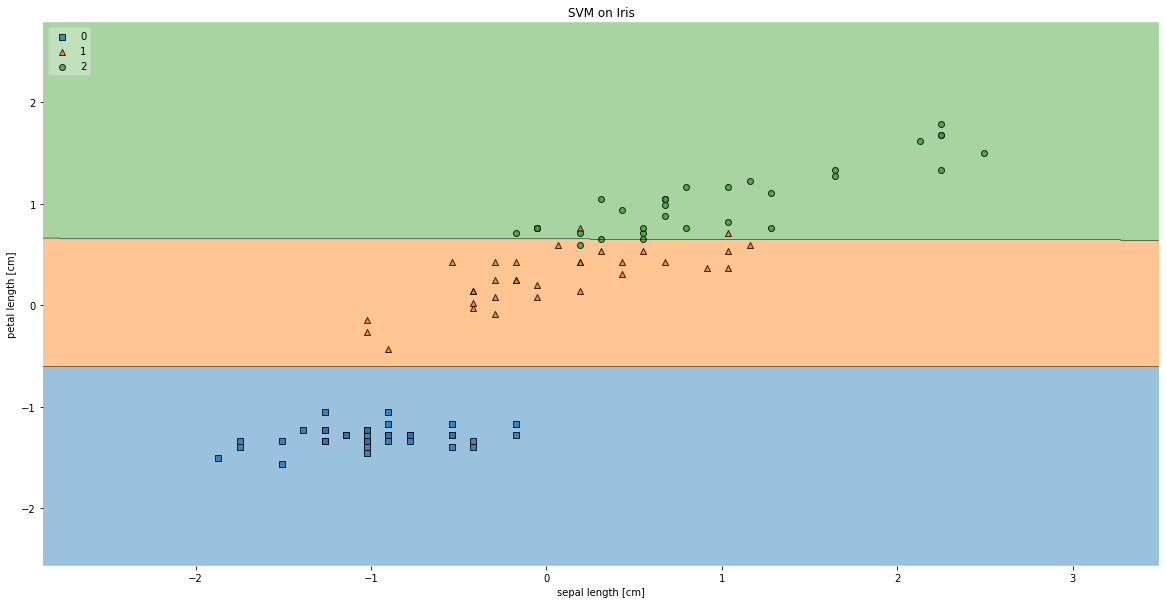

In [ ]:

# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Trying different combinations:

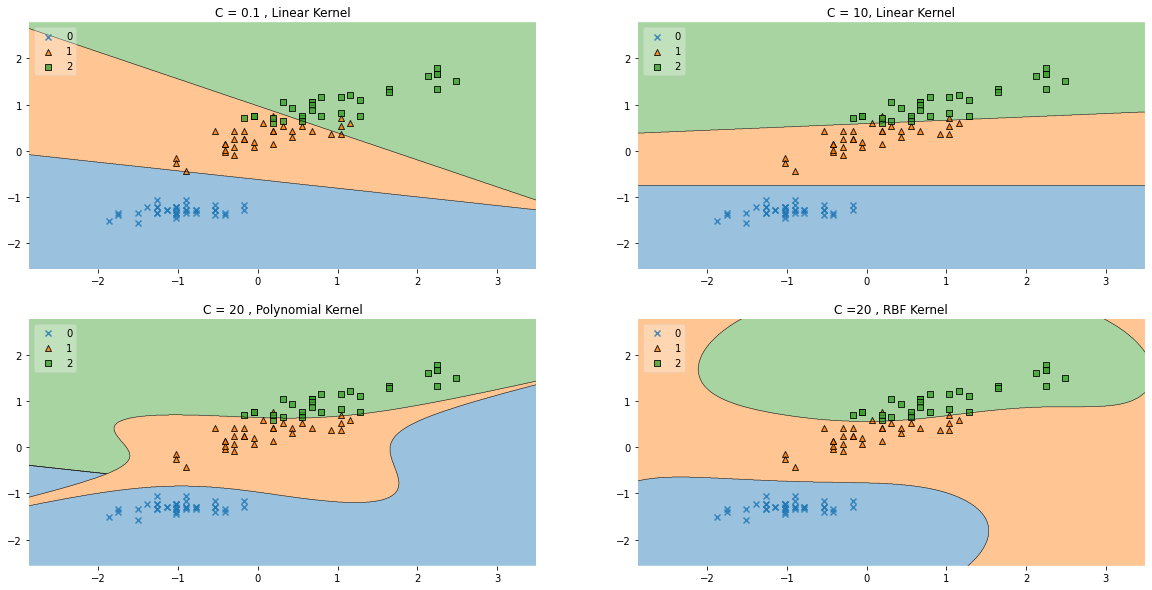

In [ ]:
gs = gridspec.GridSpec(2, 2)

plt.rcParams['figure.figsize'] = (20, 10)

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

- Increasing C, increases bias, reduces the variance (we become more tolerant of violations to the margin, margin will widen)

- Decreasing C, reduces bias, increases variance (we become less tolerant of violations to the margin, margin narrows)

# CODE: SVM with a non-linear Dataset

We are going to work with a synthatic dataset composed of the XOR gate

<img src = https://www.bogotobogo.com/python/scikit-learn/images/svm2/XOR-GATE.png>

## Generate the dataset

In [ ]:
np.random.seed(0) ## to reproduce the results
X_xor = np.random.randn(500, 2) ## Generate 500 itegers
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:,1] > 0, dtype = int) ## Output
y_xor = np.where(y_xor, 0 , 1)

## Split the dataset


In [ ]:

X_xor, y_xor = shuffle_arrays_unison(arrays=[X_xor, y_xor], random_seed=42)

X_train, y_train = X_xor[:400], y_xor[:400]
X_test, y_test = X_xor[400:], y_xor[400:]

## Train Different Kernels

C:\Users\Ahmed\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


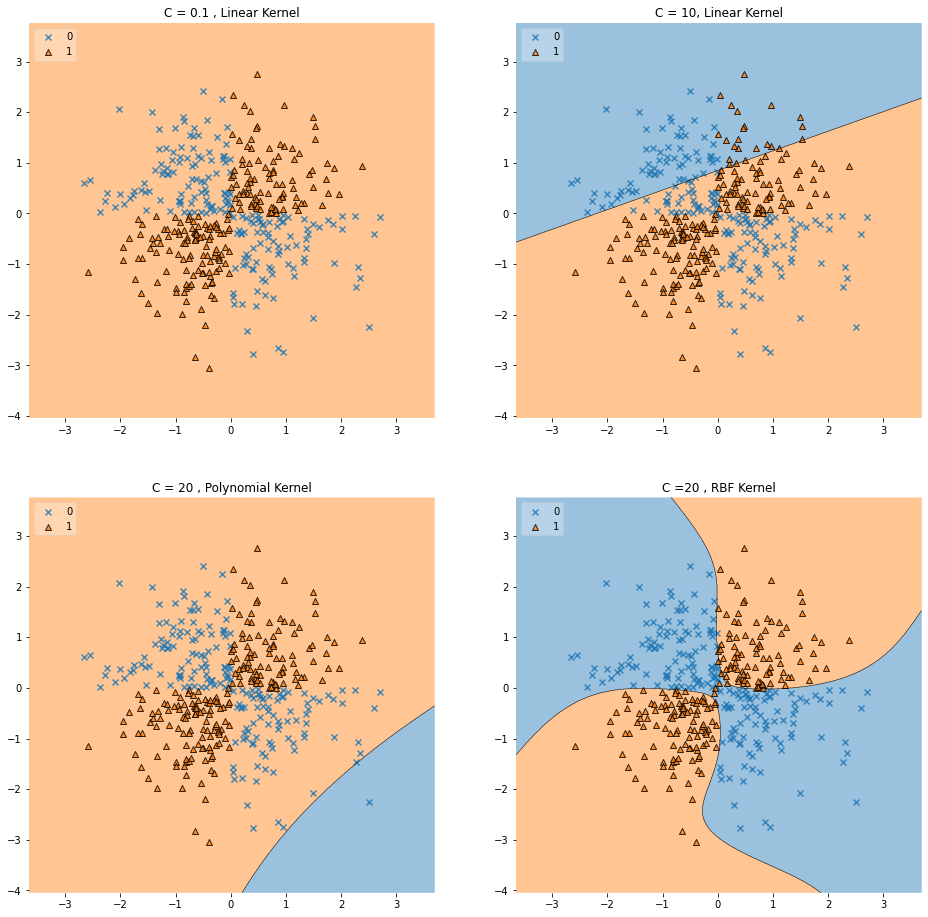

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

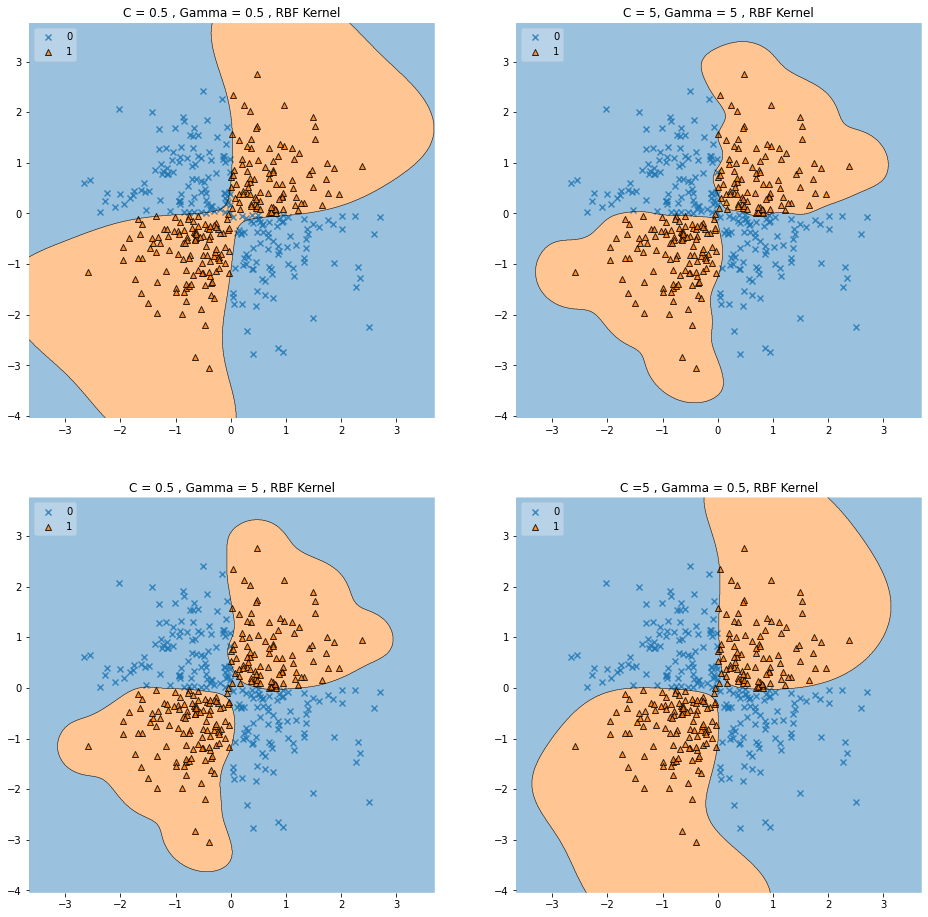

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=5, kernel='rbf', gamma = 5)
clf3 = SVC(C=0.5, kernel='rbf', gamma = 5)
clf4 = SVC(C=5, kernel='rbf', gamma = 0.5)
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.5 , Gamma = 0.5 , RBF Kernel' , 'C = 5, Gamma = 5 , RBF Kernel', 'C = 0.5 , Gamma = 5 , RBF Kernel'  ,'C =5 , Gamma = 0.5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

- Smaller gamma value makes the bell shaped curve wider
- Instances have a larger range of influence
- The decision boundary ends up smoother.

# Cross Validation

## Dataset

We are going to use a Speech Recoginition Dataset!

We will follow [this](https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis) Kernel

**[Gender Recognition by Voice and Speech Analysis](https://www.kaggle.com/primaryobjects/voicegender)**

- This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. 


- The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. 


- The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz

### Dataset Features

The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute - difference between adjacent measurements of fundamental frequencies divided by the frequency range


- **label: male or female**

## Load the dataset

In [ ]:
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Finding correlations

In [ ]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


## Any null values?

In [ ]:
print(df.isnull().sum())
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64
Total number of labels: 3168
Number of male: 1584
Number of female: 1584


## Data Seperating, Encoding, and Standarization

In [ ]:
X=df.iloc[:, :-1]
X.head()

## Encoding
y=df.iloc[:,-1]
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

## Standard
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


## Running SVM with default hyperparamters

In [ ]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score for default parameters:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score for default parameters:
0.9763406940063092


## Running SVM with different Kernels but with their default hyperparameters

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score Linear:')
print(metrics.accuracy_score(y_test,y_pred))
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score RBF:')
print(metrics.accuracy_score(y_test,y_pred))
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score Polynomial:') #Polynomial kernel is performing poorly.The reason behind this maybe it is overfitting the training dataset
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score Linear:
0.9779179810725552
Accuracy Score RBF:
0.9763406940063092
Accuracy Score Polynomial:
0.9589905362776026


**From the above analysis, we will investigate different hyperparameters for Linear and RBF kernels only, since Polynomial performance is much worse.**

## CV with Linear Kernel

In [ ]:
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[0.91167192 0.97160883 0.97160883 0.97791798 0.95899054 0.9873817
 0.99369085 0.97791798 0.95253165 0.99367089]
0.9696991175178692


## CV with RBF Kernel

In [ ]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[0.93375394 0.95583596 0.96845426 0.96214511 0.96529968 0.99684543
 0.99053628 0.98422713 0.91455696 0.99367089]
0.9665325639899376


## Check the C hyperparameter in depth for the Linear Kernel

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9681208321686698, 0.968436289581919, 0.968436289581919, 0.9681198338857164, 0.9681198338857164]


Text(0, 0.5, 'Cross-Validated Accuracy')

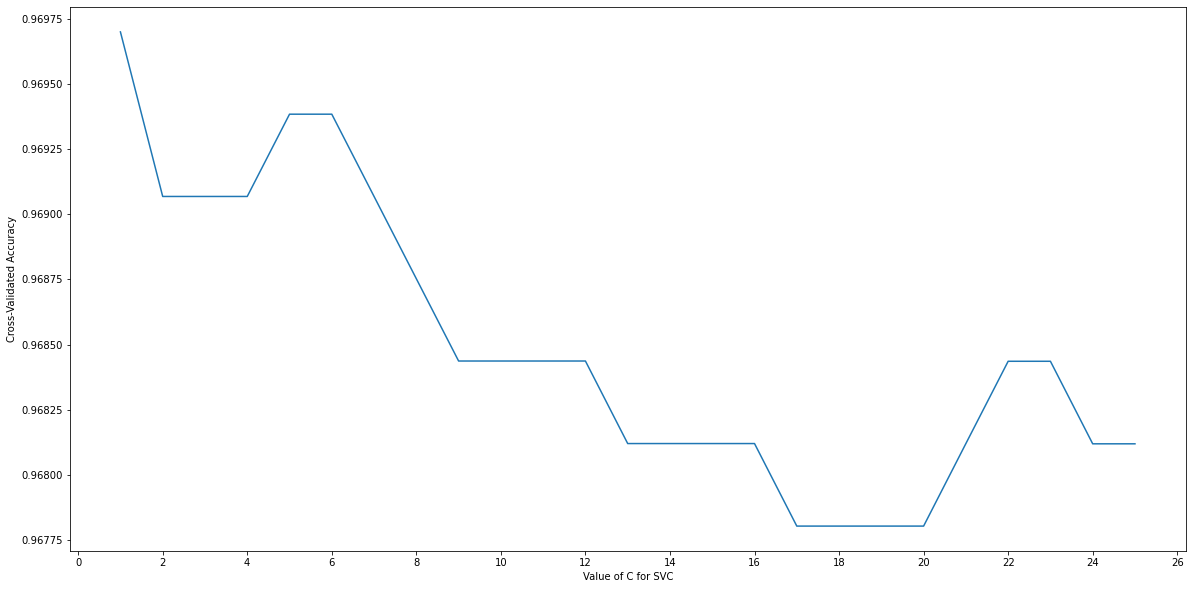

In [ ]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

**From the above plot we can see that accuracy has been close to 97% for C=1 and C=6 and then it drops around 96.8% and remains constant.**



[0.9706474863235236, 0.9693846583875733, 0.9693836601046201, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9693836601046201, 0.9696981192349158, 0.9693826618216667, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9690672044084174, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969

Text(0, 0.5, 'Cross-Validated Accuracy')

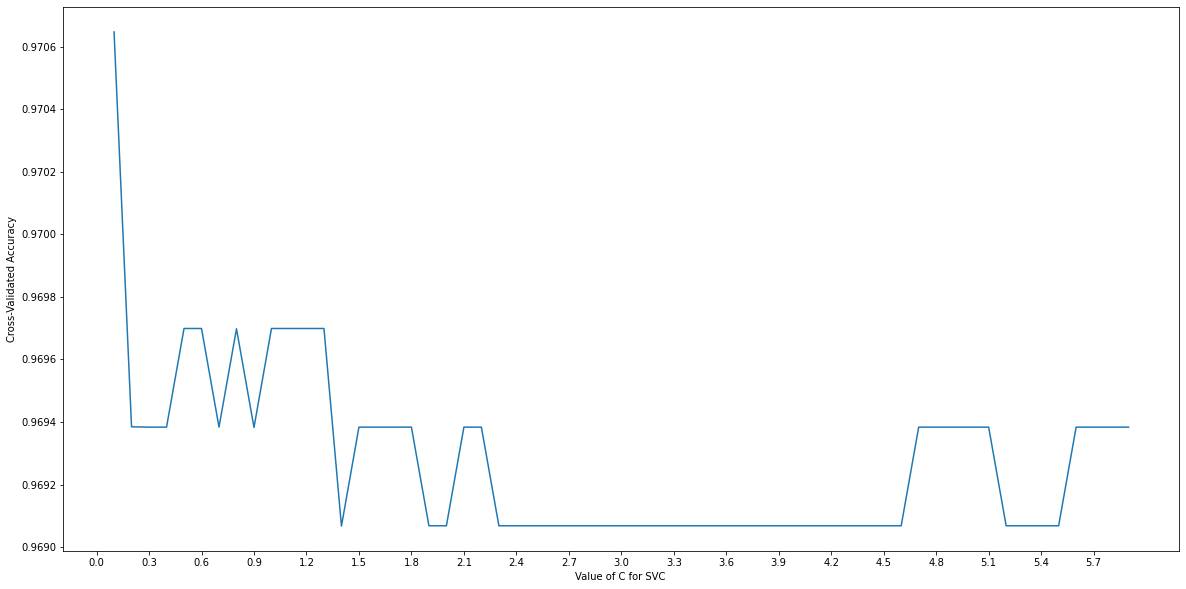

In [ ]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

## Check The Gamma hyperparameter in RBF Kernel

[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744, 0.9061883560276325, 0.6016421754582119, 0.49905362776025236]


Text(0, 0.5, 'Cross-Validated Accuracy')

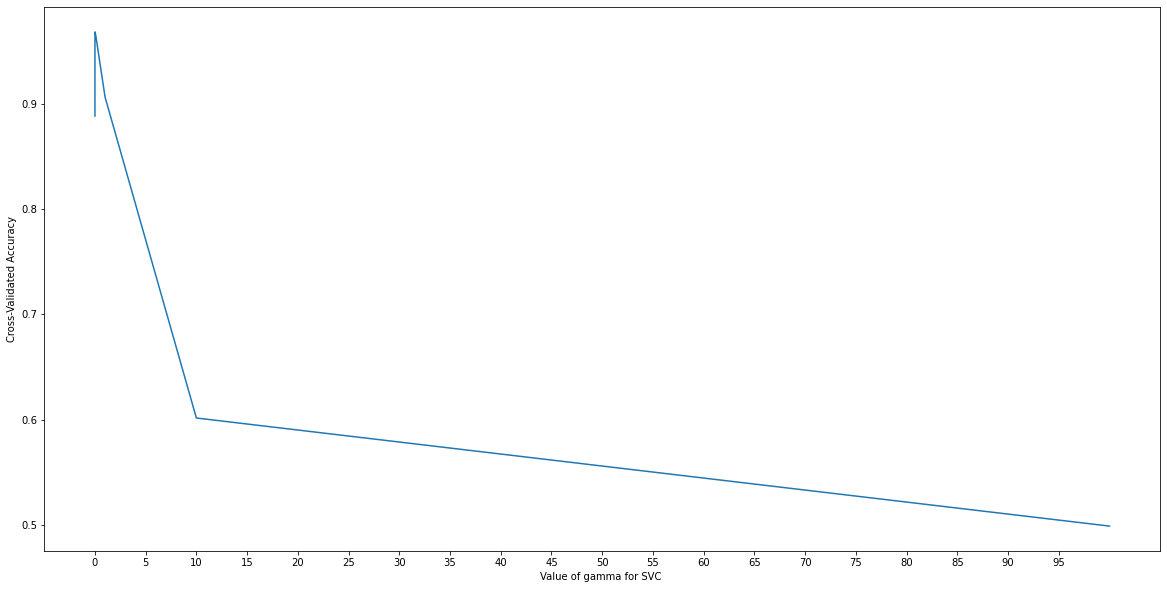

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

**We can see that for gamma=10 and 100 the kernel is performing poorly.We can also see a slight dip in accuracy score when gamma is 1.Let us look into more details for the range 0.0001 to 0.1.**



[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744]


Text(0, 0.5, 'Cross-Validated Accuracy')

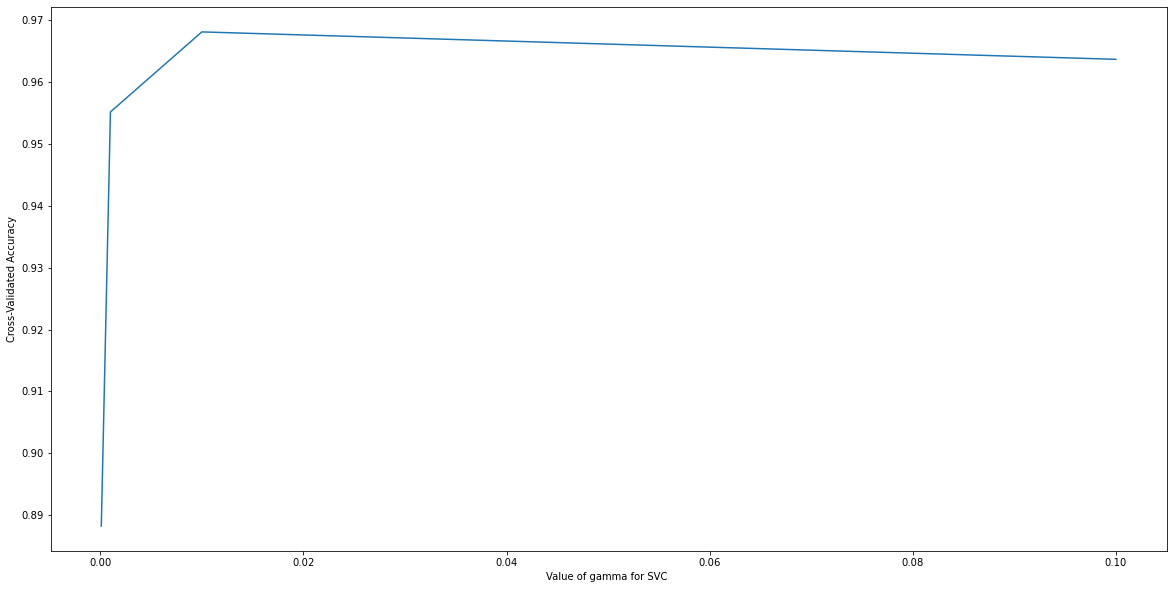

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**The score increases steadily and raches its peak at 0.01 and then decreases till gamma=1.Thus Gamma should be around 0.01.**

[0.9681168390368565, 0.9681168390368565, 0.9681148424709501, 0.9671664736652957, 0.9665325639899376]


Text(0, 0.5, 'Cross-Validated Accuracy')

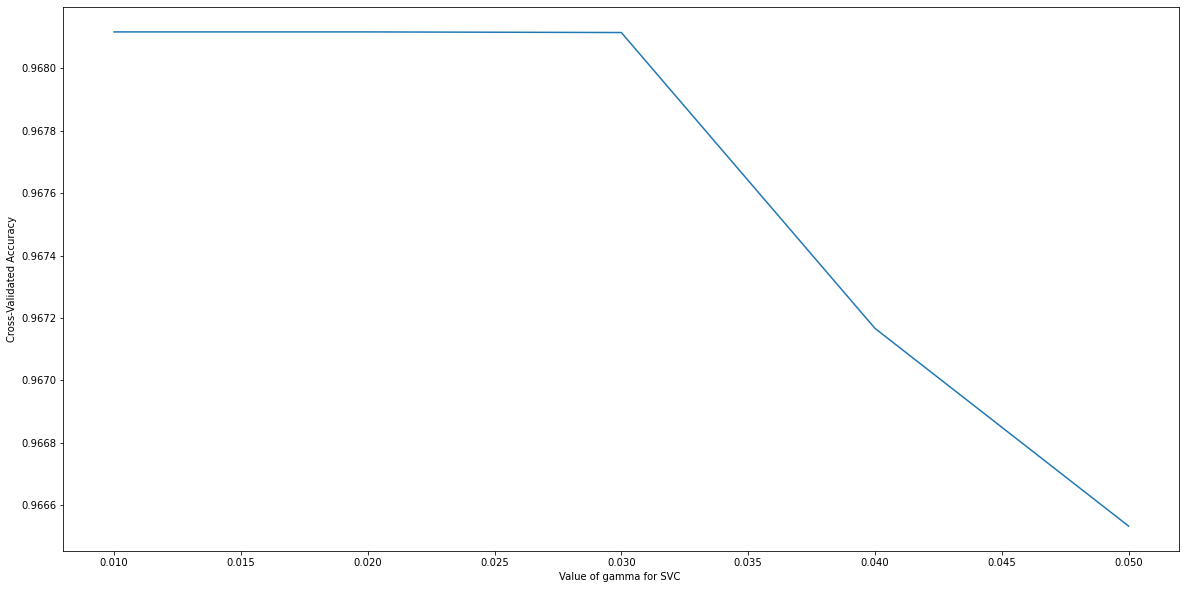

In [ ]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

## Grid Search

In [ ]:
tuned_parameters = {
    'C':  (np.arange(0.1,1,0.1)),
        'gamma':[0.01,0.02,0.03,0.04,0.05],
    
     "kernel":[ 'rbf', 'linear']

}
svm_model= SVC()

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_score_)
print(model_svm.best_params_)


0.9814556036226696


In [ ]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9779179810725552


# Multi-class SVM

SVM only considers two classes

For m-class classification problem:
- SVM 1 learns “Output==1” vs “Output != 1”
- SVM 2 learns “Output==2” vs “Output != 2”

- SVM m learns “Output==m” vs “Output != m”


 To predict the output for a new input, just predict with each SVM
and find out which one puts the prediction the furthest into the
positive region

# SVM for Regression

We can use SVMs for regression instead of classification.

- the trick is to reverse the objective


- instead of trying to fit the largest possible margin between two classes while limiting margin violations.


- SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).

<img src=https://i.ibb.co/v1X2V9P/10.jpg>

# Resources:

This lab took a lot of time and resources to prepare. 
Take a look at the resourcses below. They are super helpful!

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions


https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Support_Vector_Machines_SVM_2.php


https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78


https://www.datasciencecentral.com/profiles/blogs/implementing-a-soft-margin-kernelized-support-vector-machine
https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

https://www.cs.umd.edu/~samir/498/SVM.pdf

https://people.csail.mit.edu/dsontag/courses/ml14/slides/lecture2.pdf

https://www.vebuso.com/2020/02/a-top-machine-learning-algorithm-explained-support-vector-machines-svms/


https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496


https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

http://web.mit.edu/6.034/wwwbob/svm.pdf

Hands on machine learning with scikit learn and tensorflow by Aurélien Géron , Chapter



# Tasks

- Task 1  [7 Points]: Work with [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews)
    - Perform proper preprocessing and visualization
    - Perform proper hyperparameter tuning **-SVM-**. JUSTIFY ALL THE HYPERPARAMETER VALUES
    - **Hint**: Check [this](https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589) tutorial and this [kernel](https://www.kaggle.com/laowingkin/amazon-fine-food-review-sentiment-analysis) for help 

* Task 2 [3 Points] : Follow [this tutorial](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn) on **Naive Bayes** and apply what you learnt on the [Spam Classification dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)



* Task 3 [4 Points] :  BONUS
    - Follow this [tutorial](https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/) on **LDA** and apply what you learnt on the [Pokemon dataset](https://www.kaggle.com/rounakbanik/pokemon)

    - **Hint**: You can use [this kernel for reference](https://www.kaggle.com/residentmario/linear-discriminant-analysis-with-pokemon-stats)